In [1]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit
#!/usr/bin/python

In [2]:
phis=[0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55]#[0.1,0.2,0.3,0.45,0.5]
def getmsd(phi,nam):
    print phi
    dat = np.loadtxt('data/'+nam+str(phi)+'/phi'+str(phi)+'run0.csv',delimiter=',')
    msd = np.zeros(dat.shape[0])
    namelist = os.listdir("data/"+nam+str(phi)+"/")
    norun = len(namelist)
    print norun
    datm = []
    delist = [] 
    for name in namelist:
        dat = np.loadtxt('data/'+nam+str(phi)+"/"+name,delimiter=',')
        #print dat.shape,name
        t = dat[:,0]
        #plt.plot(t,dat[:,1],'.')
        #plt.plot(t,dat[:,1]/t/4.)
        #plt.xscale('log')
        datm.append(dat[:,1])
        deff = dat[:,1][1:]/t[1:]/4
        delist.append(np.mean(deff[(t[1:]>1e-3)]))
    #plt.plot(t,dat[:,1]/t/4.)
    #plt.xscale('log')
    mean = np.mean(datm,axis=0)
    #var = np.mean((datm-mean)**2,axis=0)
    #std = np.sqrt(var)
    t = dat[:,0]
    out = np.column_stack((t,mean))
    name = 'data/2Dcrowding_'+nam+str(phi)+'.csv'
    filename = open(name,'w')
    np.savetxt(filename,out,delimiter=',',fmt='%s')
    filename.close()
    print 'save in '+name
    return out,[np.mean(delist),np.std(delist)]
stats = []
for phi in phis:
    for nam in ['BDmocN120phi']:#,'BDmocN49phi','BDmocN81phi']:
    #nam ='BDmocphi2_'#'BDmocphi
        out,stat = getmsd(phi,nam)
        stats.append(stat)
        #tt = np.logspace(-10,-1,50)
        #plot2(out)
        #plt.plot(tt,msdf(tt,c1[0],c1[1],c1[2]),'-',label='fit by 4dt+A+Blnt')


0.05
80
save in data/2Dcrowding_BDmocN120phi0.05.csv
0.1
80
save in data/2Dcrowding_BDmocN120phi0.1.csv
0.15
80
save in data/2Dcrowding_BDmocN120phi0.15.csv
0.2
80
save in data/2Dcrowding_BDmocN120phi0.2.csv
0.25
80
save in data/2Dcrowding_BDmocN120phi0.25.csv
0.3
80
save in data/2Dcrowding_BDmocN120phi0.3.csv
0.35
80
save in data/2Dcrowding_BDmocN120phi0.35.csv
0.4
80
save in data/2Dcrowding_BDmocN120phi0.4.csv
0.45
80
save in data/2Dcrowding_BDmocN120phi0.45.csv
0.5
80
save in data/2Dcrowding_BDmocN120phi0.5.csv
0.55
40
save in data/2Dcrowding_BDmocN120phi0.55.csv


(0.90804253466628015, 0.824620130563267, 0.74394964042802492, 0.67533481048114741, 0.60598316687796405, 0.54450425022283255, 0.49313001996674455, 0.44278122182988816, 0.3900430382981484, 0.33731935730880658, 0.27672769730434654)
(0.048695583400131449, 0.04128777335104563, 0.039411437976376446, 0.036158607631194349, 0.02801296397283231, 0.029436530571336095, 0.026940353375172463, 0.02606433268370947, 0.023348225271125435, 0.021371854969047137, 0.016742903699305405)


<Container object of 3 artists>

/usr/lib/python2.7/dist-packages/matplotlib/collections.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


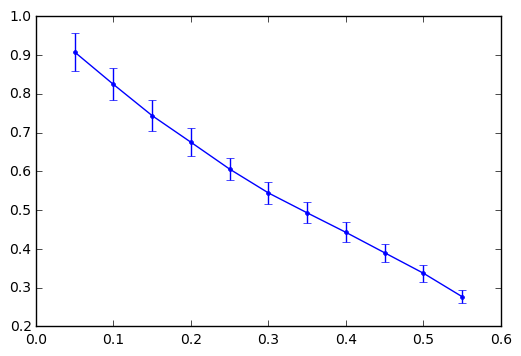

In [3]:
demean,destd = zip(*stats)
print demean
print destd
plt.errorbar(phis,demean,yerr=destd,fmt='.-')

In [3]:
def plot1(out):
    t = out[:,0]
    msd = out[:,1]
    #std = out[:,2]
    #plt.errorbar(t,msd,yerr=std,fmt='.-')
    plt.plot(t,msd,'.')
    plt.yscale('log')
    plt.xscale('log')
    plt.plot(t,4*t,'r--')
    #plt.ylim(0,0.2)
    #plt.xlim(1e-2,1e-1)
#plot1(out)

0.276727697304


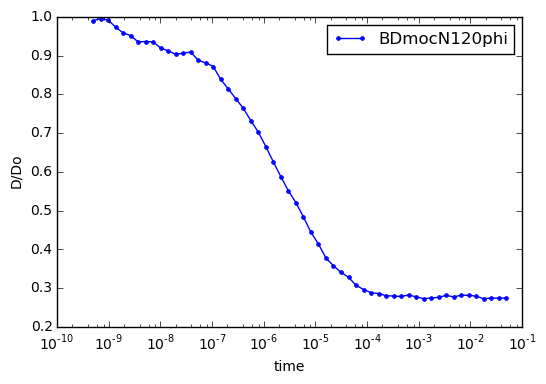

In [7]:
def plot2(out):
    msd = out[:,1][1:]
    t=out[:,0][1:]
    #error = out[:,2][1:]/t/4.
    Deff = msd/t/4.
    #plt.errorbar(t,Deff,yerr=error,fmt='.',label=nam)
    plt.plot(t,Deff,'.-',label=nam)
    #plt.ylim(0.3,0.5)
    #plt.xlim(1e-5,1e-1)
    #plt.yticks(np.arange(0.5,1,0.1))
    #plt.grid()
    plt.xlabel("time")
    plt.ylabel("D/Do")
    plt.legend()
    plt.xscale('log')
    print np.mean(Deff[(t>1e-3)])
plot2(out)


In [6]:
print msd[-1]

0.154506076825


In [10]:
print np.mean(Deff[-100:])

0.211670643972


In [2]:
import numpy as np
a=np.array([1,2])

In [7]:
print np.zeros(10).shape

(10,)
